# Cell graphs

Deng Zhaoguo  
Invalid Date

# load

In [1]:
library(gg.gap) 
library(openxlsx)
library(reshape2)
library(forcats)
library(dplyr)
library(ggplot2)
library(tidyverse)

# 1A. circular histo

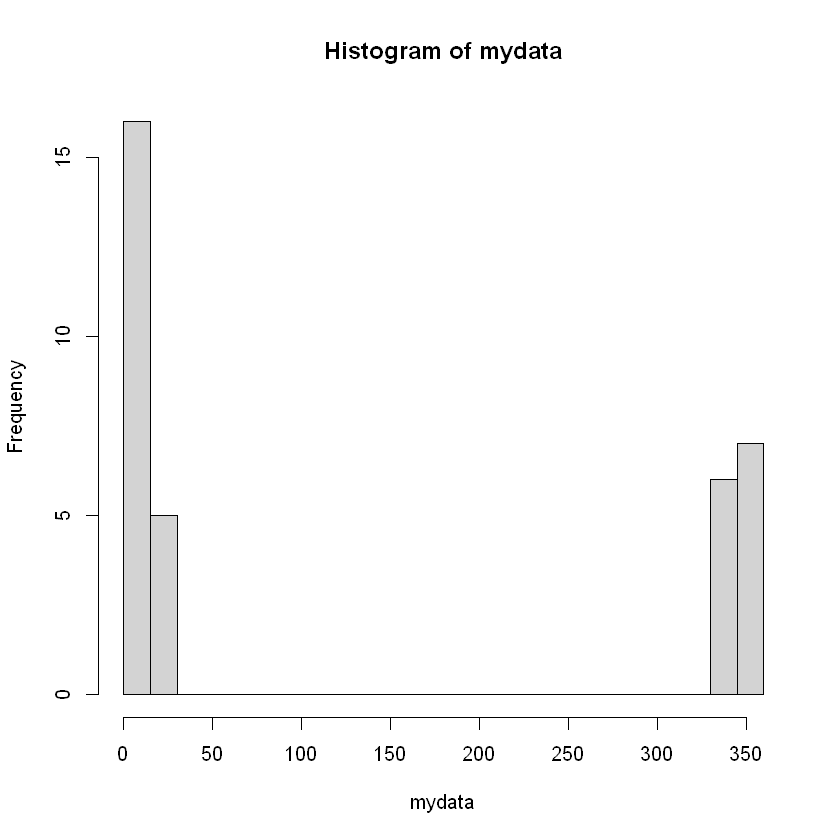

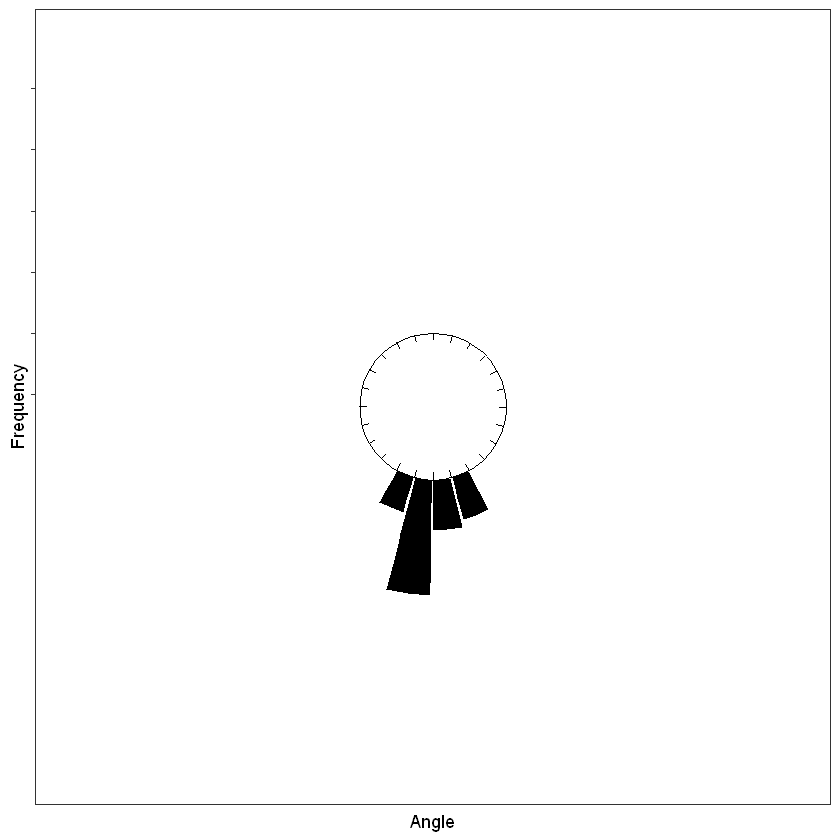

In [2]:
# read data from files

#read data xlsx
df = read.xlsx("1A.xlsx", sheet = 1)
mydata = df$WT

# plot options !!!!!!!
yoffset = -0.3 #set y offset(inner circle size)
ylimit=1  #set y limit#

degree = 15   #set interval degree here
mycolor = "black"  #set color

Mystart = pi # set start angle, pi=180
Mydirection = 1 # set direction 1=clockwise,  -1 = anti-clockwise
range_from = 0
range_to= 360

#plot circular histograph

h = hist(mydata, breaks = seq(from = range_from, to = range_to, by = degree))
d <- as.data.frame(list(Angle = h$mids, Frequency = h$density * degree))
#plot version #2

p <-ggplot(d, aes(x = Angle, y = Frequency)) +
  coord_polar(theta = "x", start = Mystart , direction = Mydirection) +
  geom_bar(stat = "identity", fill = mycolor) +
  scale_y_continuous(limits = c(yoffset,ylimit)) +
  
  geom_hline(yintercept=0,color="black") +
  geom_segment(aes(x=seq(range_from, range_to-degree, degree), xend=seq(range_from, range_to-degree, degree), y= yoffset/10, yend=0),size=0.2,color="black")+
  
  theme_bw()+
  theme(panel.grid = element_blank()) +
  theme(axis.text.x = element_blank())+
  theme(axis.text.y = element_blank()) 


print(p)

## KS.test with multiple comparison

In [3]:
#set path read data xlsx
df = read.xlsx("1A.xlsx", sheet = 1)

nlen=7
p=vector(length=(nlen-1))
for (j in 2:nlen){
  i = 1
  p[j-1]=ks.test(df[,i],df[,j])$p.value
}

padj = p.adjust(p,method = "bonferroni")
padj

8.26855165548767e-06 1.58971933092979e-05 0.000823186434853088 1 1 1

# 5B. MPKMKK Abundance

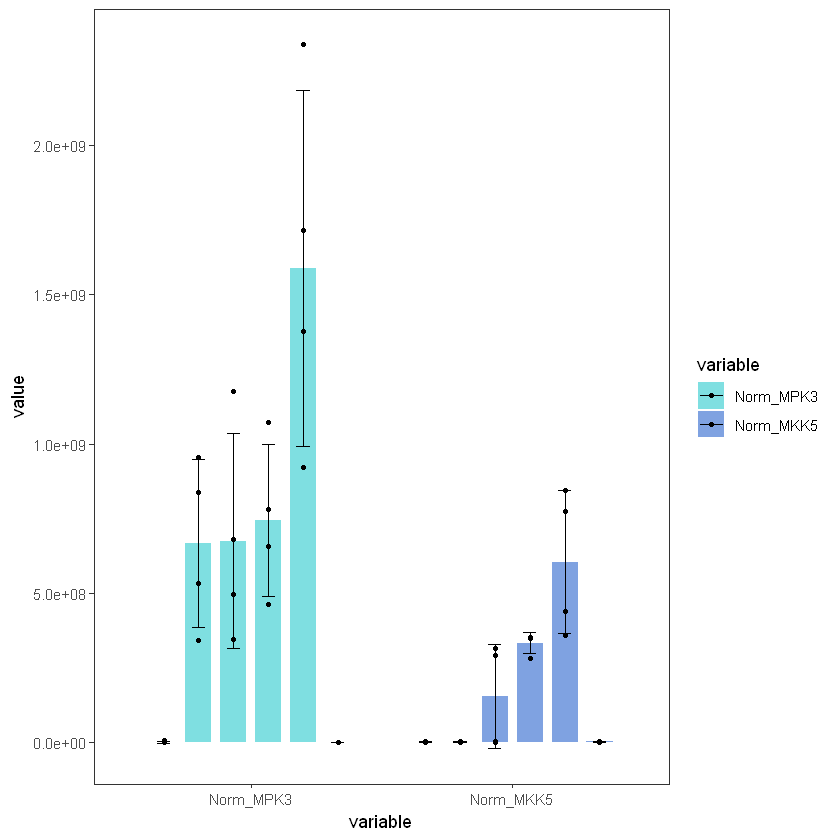

In [4]:
mydata=read.xlsx('5B.xlsx')[,c(6,7,8)]

df=melt(mydata,id="group")
colnames(df)=c("group","variable","value")
df$group = as.factor(df$group)
df$group <- fct_inorder(df$group)


#set width

my.bar.width = 0.6
my.jitter.width = 0.05
my.dodge.width = 0.8
#Plot-1: Barplot(grouped) 
p1 <-
  ggplot(df, aes(x = variable, y = value, group = group, fill = variable)) +
  scale_fill_manual(values = c("#00BFC4", '#0046C4'))+
  stat_summary(
    fun = mean,
    alpha=0.5,
    geom = "bar",
    width = my.bar.width,
    position = position_dodge(width = my.dodge.width),
    show.legend = T,
  ) +
  stat_summary(
    fun.data = mean_sdl,
    fun.args = list(mult = 1),
    geom = "errorbar",
    width = my.bar.width/2,
    position = position_dodge(width = my.dodge.width),
    show.legend = T
  ) +
  geom_point(
    size = 1,
    shape = 16,
    position = position_dodge(width = my.dodge.width)
  ) +
  
  theme_bw() +
  theme(panel.grid = element_blank())

print(p1)

# 5F. plotprofile

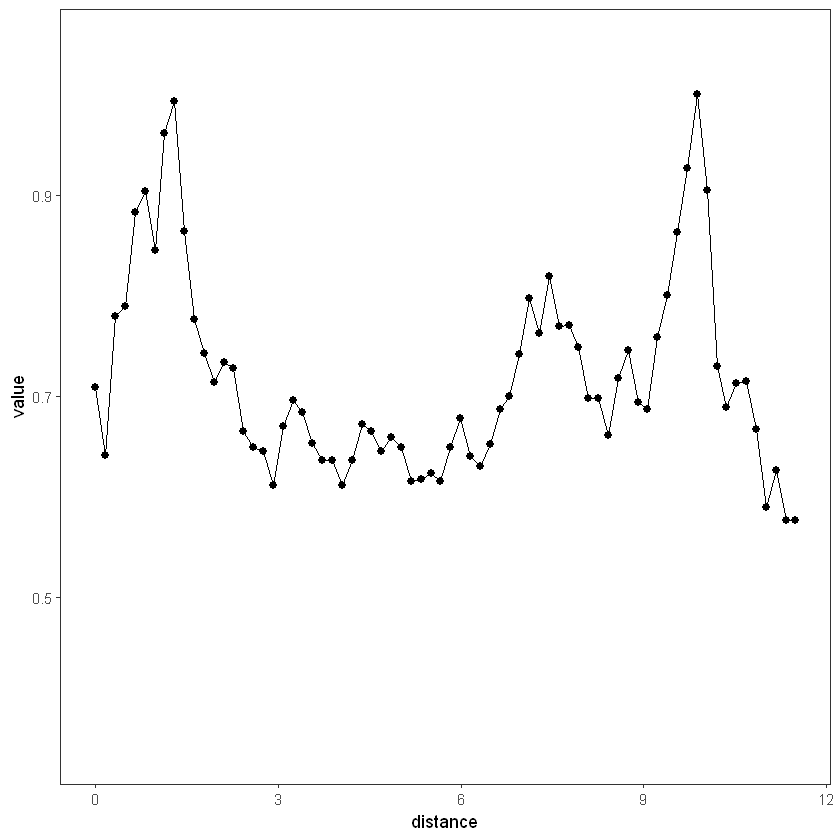

In [5]:
mydata = read.xlsx('5F.xlsx', sheet = 1)

i = 1

df=mydata[,c(4*i-3,4*i)]

df=df[!is.na(df[,1]),]

colnames(df) = c( "distance", "value")

#set width

ymin = 0.35

p2 <-
  ggplot(df, aes(x = distance, y =value, group=1)) +
  geom_line(linewidth=0.12)+
  geom_point(
    size = 2,
    shape = 16
    
  ) +
  ylim(ymin,1.05)+
  theme_bw() +
  theme(panel.grid = element_blank())

print(p2)

# 5K.A13 pheno

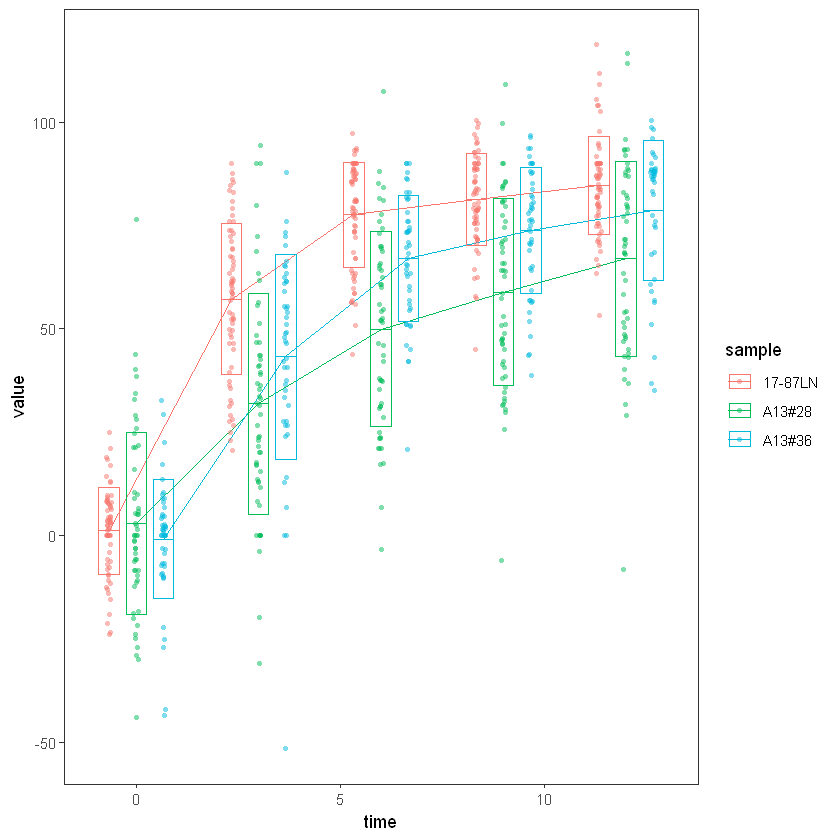

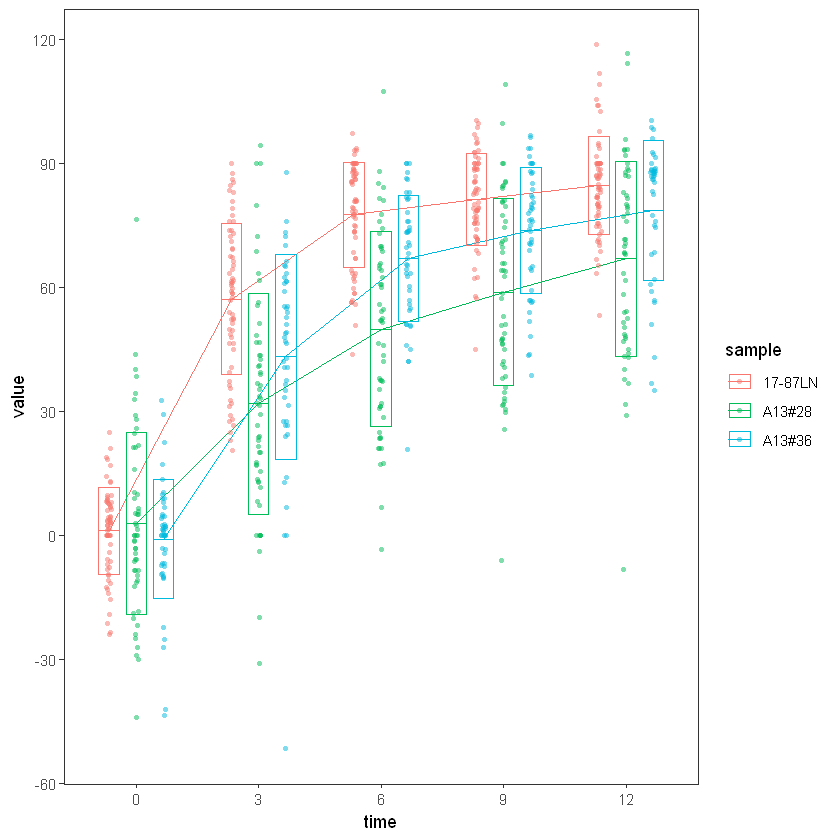

In [6]:
df = as.data.frame(matrix(ncol=3))
colnames(df)=c("time","value","sample")

SampleName=c('17-87','17-87LN',"A13#15","A13#28","A13#36")

for (i in c(2,4,5)){
  temp = melt(read.xlsx("5K.xlsx",sheet=i)[,c(2:6)])
  temp[,3]=SampleName[i]
  colnames(temp)=c("time","value","sample")
  df = as.data.frame(bind_rows(df,temp))
  
}

df=df[!is.na(df[,1]),]


#merge
df$time=as.numeric(as.character(df$time))
df$sample=as.factor(df$sample)
df$sample <- fct_inorder(df$sample)

#set width
my.bar.width = 1.5
my.jitter.width = 0.3
my.dodge.width = 2
#Plot-2: line graph
p2 <-
  ggplot(df, aes(x = time, y = value, group = sample, color = sample)) +
  scale_color_manual(values=c('#F8766D','#00BD57','#00BADE'))+
#  geom_errorbar(aes(ymin = mean-sd ,ymax = mean + sd),size = 1.2,width = 0.2,color = "gray")+
  stat_summary(
    fun = mean,
    geom = "line",
    position = position_dodge(width = my.dodge.width),
    alpha = 1,
    linewidth= 0.3,
    show.legend = T
  ) +
  
  stat_summary(
    fun.data = mean_sdl,
    fun.args = list(mult = 1),
    geom = "crossbar",
    linewidth= 0.2,
    position = position_dodge(width = my.dodge.width),
    width = my.bar.width,
    alpha = 1,
    show.legend = T
  ) +
  
  geom_point(
    size =1,
    shape = 16,
    alpha = 0.5,
    position = position_jitterdodge(jitter.width = my.jitter.width, dodge.width = my.dodge.width)
  ) +
  
  theme_bw() +
  theme(panel.grid = element_blank())

p2

p2 +
  scale_x_continuous(breaks=c(0,3,6,9,12))+
  scale_y_continuous(breaks=c(-90,-60,-30,0,30,60,90,120,150,180))

# 6C. toc-LAZY

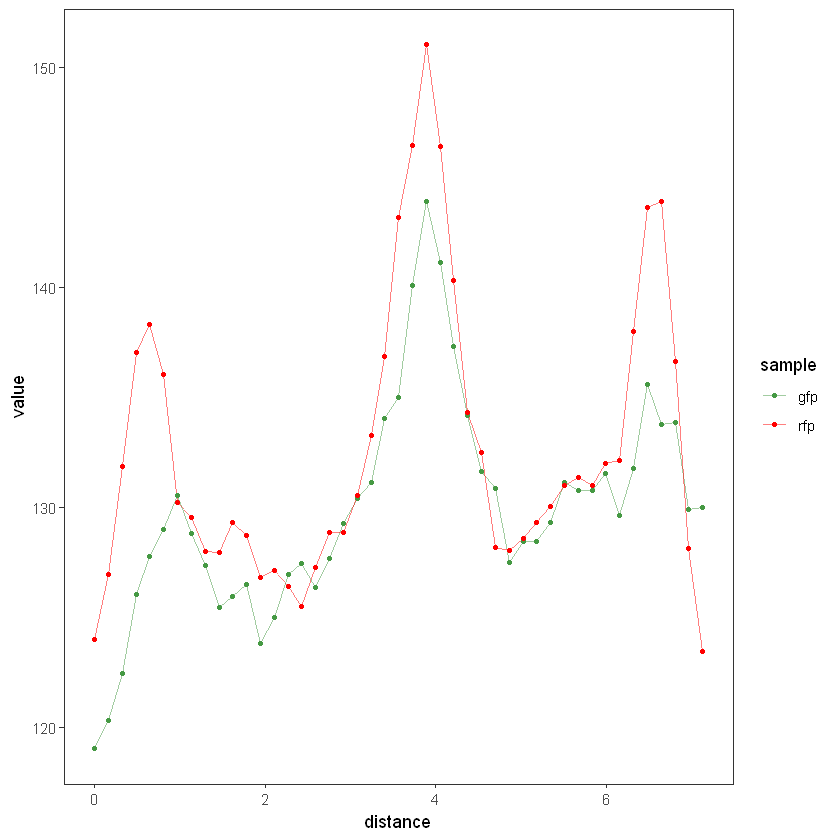

In [7]:
mydata = read.xlsx('6C.xlsx',sheet=1)

#data melt and force order
df = melt(mydata,id="distance")
colnames(df)=c("distance","sample","value")

df$sample=as.factor(df$sample)
df$sample <- fct_inorder(df$sample)


#line graph
p2<-ggplot(df, aes(x = distance, y = value, group = sample, color=sample) )+
  stat_summary(fun = mean, 
               geom = "line", 
               alpha = 0.5,
               width = 0.5, 
               show.legend = T) +
  geom_point(size = 1, shape = 16, position=position_jitterdodge(jitter.width = 0.0,dodge.width = 0)) +
  scale_color_manual(values=c("#459943",'red'))+
  theme_bw()+
  theme(panel.grid = element_blank()) 

p2